### Importy

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Fraktale samopodobne

## Trójkąt Sierpińskiego

In [2]:
def sierpinski_triangle(points, n):
    if n == 0:
        return [points]

    # Wyznacz punkty podziału
    mid1 = ((points[0][0] + points[1][0]) / 2, (points[0][1] + points[1][1]) / 2)
    mid2 = ((points[1][0] + points[2][0]) / 2, (points[1][1] + points[2][1]) / 2)
    mid3 = ((points[0][0] + points[2][0]) / 2, (points[0][1] + points[2][1]) / 2)
    
    # Podziel trójkąt na 3 mniejsze
    triangles = []
    triangles.extend(sierpinski_triangle([points[0], mid1, mid3], n-1))
    triangles.extend(sierpinski_triangle([points[1], mid1, mid2], n-1))
    triangles.extend(sierpinski_triangle([points[2], mid2, mid3], n-1))

    return triangles

In [38]:
def draw_sierpinski(n):
    fig, axs = plt.subplots(1, n, figsize=(12, 2))
    for i, ax in enumerate(axs):
        triangles = sierpinski_triangle([(0, 0), (1, 0), (0.5, np.sqrt(3)/2)], i)
        for triangle in triangles:
            triangle = np.array(triangle)
            ax.fill(triangle[:, 0], triangle[:, 1], 'black')
        ax.axis('equal')
        ax.axis('off')

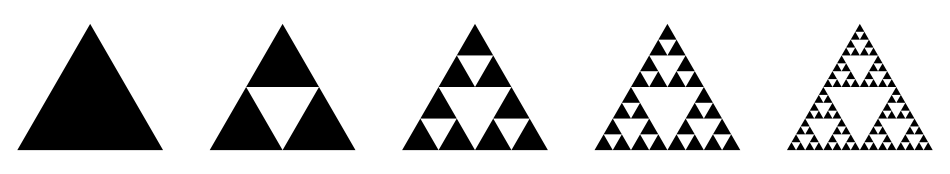

In [37]:
draw_sierpinski(5)

## Dywan Sierpińskiego

In [36]:
def sierpinski_carpet(points, n, s=3):
    if n == 0:
        return [points]
    
    rectangles = []
    
    y_h = (points[2][1] - points[1][1]) / s
    x_h = (points[1][0] - points[0][0]) / s

    for i in range(s):
        for j in range(s):
            if i != int(s / 2) or j != int(s/2):
               rectangles.extend(sierpinski_carpet([(points[0][0] + i * x_h, points[0][1] + j * y_h), (points[0][0] + (i + 1) * x_h, points[0][1] + j * y_h), (points[0][0] + (i + 1) * x_h, points[0][1] + (j + 1) * y_h), (points[0][0] + i * x_h, points[0][1] + (j + 1) * y_h)], n-1))

    return rectangles

In [20]:
def draw_sierpinski(n):
    fig, axs = plt.subplots(1, n, figsize=(12, 2))
    for i, ax in enumerate(axs):
        rectangles = sierpinski_carpet([(0, 0), (1, 0), (1, 1), (0, 1)], i)
        for rectangle in rectangles:
            rectangle = np.array(rectangle)
            ax.fill(rectangle[:, 0], rectangle[:, 1], 'black')
        ax.axis('equal')
        ax.axis('off')

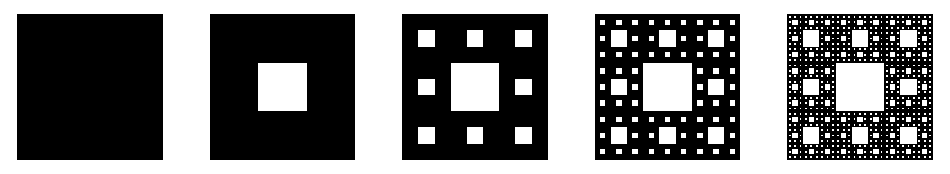

In [37]:
draw_sierpinski(5)

## Krzywa Kocha

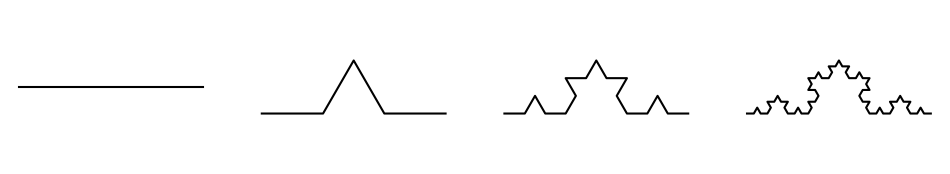

In [6]:
def koch_curve(points, n):
    """
    Generuje punkty krzywej Kocha.
    
    Args:
    - points (list): lista punktów startowych.
    - n (int): liczba iteracji.
    
    Returns:
    - list: punkty krzywej Kocha po n iteracjach.
    """
    if n == 0:
        return points
    else:
        new_points = []
        for i in range(len(points) - 1):
            p1 = points[i]
            p2 = points[i+1]
            
            # Oblicz punkty podziału
            delta_x = p2[0] - p1[0]
            delta_y = p2[1] - p1[1]

            pA = (2*p1[0] + p2[0]) / 3, (2*p1[1] + p2[1]) / 3
            pB = (p1[0] + 2*p2[0]) / 3, (p1[1] + 2*p2[1]) / 3
            pC = (p1[0] + 0.5*delta_x - (np.sqrt(3)/6)*delta_y, p1[1] + 0.5*delta_y + (np.sqrt(3)/6)*delta_x)

            new_points.extend([p1, pA, pC, pB])
        new_points.append(points[-1])
        return koch_curve(new_points, n-1)


def draw_koch_curve(n):
    fig, axs = plt.subplots(1, n, figsize=(12, 2))
    for i, ax in enumerate(axs):
        points = [(0, 0), (1, 0)]
        koch_points = koch_curve(points, i)
        x, y = zip(*koch_points)
        ax.plot(x, y, 'black')
        ax.axis('equal')
        ax.axis('off')



# Rysuj krzywą Kocha dla 4 iteracji
draw_koch_curve(4)

# Fraktale samoafiniczne

## Paprotka Barnsleya